# Traffic sign recongtion project

#### By Yaozhong Zhang  July 12, 2018

## Load Data

In [7]:
import pickle

training_file = "train.p"
validation_file = "valid.p"
testing_file = "test.p"

with open(training_file,mode='rb') as f:
    train = pickle.load(f)
with open(validation_file,mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file,mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'],test['labels']

In [8]:
# Provide a basic summary of the data set

n_train = len(X_train)
n_validation = len(X_valid)
n_test = len(X_test)

image_shape = X_train[0].shape
#n_classes = 

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
#print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)


11


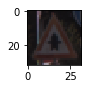

In [45]:
# visualize data

import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

In [14]:
# shuffle the training data

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [27]:
# set up TensorFlow
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

In [28]:
# Implement LeNet-5

"""
Architecture
Layer 1: Convolutional. The output shape should be 28x28x6.

Activation. Your choice of activation function.

Pooling. The output shape should be 14x14x6.

Layer 2: Convolutional. The output shape should be 10x10x16.

Activation. Your choice of activation function.

Pooling. The output shape should be 5x5x16.

Flatten. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using tf.contrib.layers.flatten, which is already imported for you.

Layer 3: Fully Connected. This should have 120 outputs.

Activation. Your choice of activation function.

Layer 4: Fully Connected. This should have 84 outputs.

Activation. Your choice of activation function.

Layer 5: Fully Connected (Logits). This should have 10 outputs.
"""

from tensorflow.contrib.layers import flatten

def LeNet(x):
    
    #Layer 1 convolutional Input 32x32x3
    conv1_W = tf.Variable(tf.truncated_normal([5,5,3,6]))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x,conv1_W,strides = [1,1,1,1],padding = 'VALID')
    conv1 = tf.nn.bias_add(conv1,conv1_b)
    
    conv1 = tf.nn.relu(conv1)
    
    #Pooling Input 28x28x6
    conv1 = tf.nn.max_pool(conv1,ksize = [1,2,2,1],strides=[1,2,2,1],padding = 'SAME')
    
    #Layer 2 convolutional Input 14x14x6
    conv2_W = tf.Variable(tf.truncated_normal([5,5,6,16]))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1,conv2_W,strides = [1,1,1,1],padding = 'VALID')
    conv2 = tf.nn.bias_add(conv2,conv2_b)
    
    conv2 = tf.nn.relu(conv2)
    
    #Pooling Input 10x10x16
    conv2 = tf.nn.max_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding = 'SAME')
    
    #Flatten Input 5x5x16
    flat = flatten(conv2)
    
    #Layer 3 Fully connectted Input 400
    fc1_W = tf.Variable(tf.truncated_normal([400,120]))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(flat,fc1_W) + fc1_b
    
    fc1 = tf.nn.relu(fc1)
    
    #Layer 4 Fully connectted Input 120
    fc2_W = tf.Variable(tf.truncated_normal([120,84]))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1,fc2_W) + fc2_b
    
    fc2 = tf.nn.relu(fc2)
    
    #Layer 5 Fully connectted Input 84
    fc3_W = tf.Variable(tf.truncated_normal([84,43]))
    fc3_b = tf.Variable(tf.zeros(43))
    fc3 = tf.matmul(fc2,fc3_W) + fc3_b
    
    logits = fc3
    
    return logits
    
    

In [29]:
# set features and labels

x = tf.placeholder(tf.float32,(None,32,32,3))
y = tf.placeholder(tf.int32,(None))
one_hot_y = tf.one_hot(y,43)

In [34]:
# training pipeline

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels = one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [35]:
# Model Evaluation

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [36]:
# Train the model

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print(num_examples)
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

34799
Training...

EPOCH 1 ...
Validation Accuracy = 0.054

EPOCH 2 ...
Validation Accuracy = 0.043

EPOCH 3 ...
Validation Accuracy = 0.041

Model saved
